In [6]:
import numpy as np
import matplotlib.pyplot as plt
from control_segmenter import ControlSegmenter
from manager import DataManager
from comparator import Indicator, Comparator
import tifffile as tiff

%load_ext autoreload
%autoreload 2

#y_win = (6000, 7000)
#x_win = (9000, 10000)

x_win = (7750, 10000) # first dimension (cols)
y_win = (5000, 7500) # second dimension (rows)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
origin_csv_fname = None
full_tiff = '/Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif'
color_slice = '/Users/brianbrogan/Desktop/KI24/figures/test_slice.tiff'

image_fname = full_tiff

## Variable Definition - start/stop - ensure range is divisible by step

# Distance Transform Percentile for Watershed Marker Definition
dtp = [0.1, 0.5] 
dtp_step = 0.05

# Watershed Dilation Kernel Size
dks = [2, 7]
dks_step = 1

# Minimum Cell Area Count (pixels)
minca = [5, 105]
minca_step = 10

# Maximum Cell Area Count (pixels)
maxca = [850, 1200]
maxca_step = 50


watershed_var_ranges = {
    'dt_percentile': np.arange(dtp[0], dtp[1]+dtp_step, dtp_step),
    'dilation_kernel_size': np.arange(dks[0], dks[1]+dks_step, dks_step, dtype=np.uint8),
    'minimum_cell_area': np.arange(minca[0], minca[1]+minca_step, minca_step),
    'maximum_cell_area': np.arange(maxca[0], maxca[1]+maxca_step, maxca_step)
}

print("Origin Data File: ", origin_csv_fname)
print("Selected Image File: ", image_fname)
print("Number of params to be analyzed: ", len(watershed_var_ranges))


#tiff.imwrite('figures/MaskMaker_test1.tiff', masker.preproc, photometric='minisblack')
test_segmenter = ControlSegmenter(image_fname= image_fname,
                                  test_window=[x_win, y_win],
                                    var_ranges= watershed_var_ranges,
                                    controls= [0.3,
                                                5,
                                                20,
                                                1200],
                                    #area_filter_jobn=4,
                                    channel_id=1
                                    )
test_segmenter.export(out_dir='/Users/brianbrogan/Desktop/KI24/mask_maker_output')
print(test_segmenter.var_seg_fulldf.info())
test_segmenter.var_seg_fulldf.head()

Origin Data File:  None
Selected Image File:  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif
Number of params to be analyzed:  4
Variable Engine: creating segmentations for dt_percentile : 9 settings
controls: [0.3, 5, 20, 1200]
var seg method: test_params: [array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]), 5, 20, 1200]
params testid: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
element: 0.1
Engine running... testing setting 0.1
[0.1, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 885/885 [00:08<00:00, 108.52it/s, 885/885]


696 CELLS FOUND
params testid: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
element: 0.15000000000000002
Engine running... testing setting 0.15000000000000002
[0.15000000000000002, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 544/544 [00:06<00:00, 89.00it/s, 544/544] 


372 CELLS FOUND
params testid: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
element: 0.20000000000000004
Engine running... testing setting 0.20000000000000004
[0.20000000000000004, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 400/400 [00:04<00:00, 91.26it/s, 400/400]


218 CELLS FOUND
params testid: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
element: 0.25000000000000006
Engine running... testing setting 0.25000000000000006
[0.25000000000000006, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 338/338 [00:03<00:00, 91.64it/s, 338/338]


141 CELLS FOUND
params testid: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
element: 0.30000000000000004
Engine running... testing setting 0.30000000000000004
[0.30000000000000004, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 89.64it/s, 276/276]


76 CELLS FOUND
params testid: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
element: 0.3500000000000001
Engine running... testing setting 0.3500000000000001
[0.3500000000000001, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 216/216 [00:02<00:00, 88.19it/s, 216/216]


25 CELLS FOUND
params testid: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
element: 0.40000000000000013
Engine running... testing setting 0.40000000000000013
[0.40000000000000013, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 175/175 [00:01<00:00, 90.79it/s, 175/175]


11 CELLS FOUND
params testid: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
element: 0.4500000000000001
Engine running... testing setting 0.4500000000000001
[0.4500000000000001, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 137/137 [00:01<00:00, 90.92it/s, 137/137]


4 CELLS FOUND
params testid: [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
element: 0.5000000000000001
Engine running... testing setting 0.5000000000000001
[0.5000000000000001, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 107/107 [00:01<00:00, 91.59it/s, 107/107]


1 CELLS FOUND
Variable Engine: creating segmentations for dilation_kernel_size : 6 settings
controls: [0.3, 5, 20, 1200]
var seg method: test_params: [0.3, array([2, 3, 4, 5, 6, 7], dtype=uint8), 20, 1200]
params testid: [2 3 4 5 6 7]
element: 2
Engine running... testing setting 2
[0.3, 2, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 278/278 [00:03<00:00, 89.37it/s, 278/278]


75 CELLS FOUND
params testid: [2 3 4 5 6 7]
element: 3
Engine running... testing setting 3
[0.3, 3, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 278/278 [00:03<00:00, 83.08it/s, 278/278]


76 CELLS FOUND
params testid: [2 3 4 5 6 7]
element: 4
Engine running... testing setting 4
[0.3, 4, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 285/285 [00:03<00:00, 84.19it/s, 285/285]


84 CELLS FOUND
params testid: [2 3 4 5 6 7]
element: 5
Engine running... testing setting 5
[0.3, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 90.12it/s, 276/276]


76 CELLS FOUND
params testid: [2 3 4 5 6 7]
element: 6
Engine running... testing setting 6
[0.3, 6, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 282/282 [00:03<00:00, 92.92it/s, 282/282]


81 CELLS FOUND
params testid: [2 3 4 5 6 7]
element: 7
Engine running... testing setting 7
[0.3, 7, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 89.21it/s, 276/276]


79 CELLS FOUND
Variable Engine: creating segmentations for minimum_cell_area : 11 settings
controls: [0.3, 5, 20, 1200]
var seg method: test_params: [0.3, 5, array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105]), 1200]
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 5
Engine running... testing setting 5
[0.3, 5, 5, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 91.83it/s, 276/276]


77 CELLS FOUND
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 15
Engine running... testing setting 15
[0.3, 5, 15, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 91.64it/s, 276/276]


77 CELLS FOUND
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 25
Engine running... testing setting 25
[0.3, 5, 25, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:02<00:00, 92.64it/s, 276/276] 


76 CELLS FOUND
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 35
Engine running... testing setting 35
[0.3, 5, 35, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 89.97it/s, 276/276] 


76 CELLS FOUND
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 45
Engine running... testing setting 45
[0.3, 5, 45, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:02<00:00, 93.22it/s, 276/276] 


76 CELLS FOUND
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 55
Engine running... testing setting 55
[0.3, 5, 55, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 85.92it/s, 276/276]


75 CELLS FOUND
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 65
Engine running... testing setting 65
[0.3, 5, 65, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 91.33it/s, 276/276]


75 CELLS FOUND
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 75
Engine running... testing setting 75
[0.3, 5, 75, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 86.72it/s, 276/276]


74 CELLS FOUND
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 85
Engine running... testing setting 85
[0.3, 5, 85, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:02<00:00, 92.50it/s, 276/276]


74 CELLS FOUND
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 95
Engine running... testing setting 95
[0.3, 5, 95, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 90.38it/s, 276/276]


74 CELLS FOUND
params testid: [  5  15  25  35  45  55  65  75  85  95 105]
element: 105
Engine running... testing setting 105
[0.3, 5, 105, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 89.86it/s, 276/276] 


74 CELLS FOUND
Variable Engine: creating segmentations for maximum_cell_area : 8 settings
controls: [0.3, 5, 20, 1200]
var seg method: test_params: [0.3, 5, 20, array([ 850,  900,  950, 1000, 1050, 1100, 1150, 1200])]
params testid: [ 850  900  950 1000 1050 1100 1150 1200]
element: 850
Engine running... testing setting 850
[0.3, 5, 20, 850]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 89.02it/s, 276/276]


36 CELLS FOUND
params testid: [ 850  900  950 1000 1050 1100 1150 1200]
element: 900
Engine running... testing setting 900
[0.3, 5, 20, 900]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 87.73it/s, 276/276]


41 CELLS FOUND
params testid: [ 850  900  950 1000 1050 1100 1150 1200]
element: 950
Engine running... testing setting 950
[0.3, 5, 20, 950]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 91.26it/s, 276/276] 


44 CELLS FOUND
params testid: [ 850  900  950 1000 1050 1100 1150 1200]
element: 1000
Engine running... testing setting 1000
[0.3, 5, 20, 1000]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 91.31it/s, 276/276]


49 CELLS FOUND
params testid: [ 850  900  950 1000 1050 1100 1150 1200]
element: 1050
Engine running... testing setting 1050
[0.3, 5, 20, 1050]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 91.83it/s, 276/276] 


57 CELLS FOUND
params testid: [ 850  900  950 1000 1050 1100 1150 1200]
element: 1100
Engine running... testing setting 1100
[0.3, 5, 20, 1100]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 89.31it/s, 276/276]


64 CELLS FOUND
params testid: [ 850  900  950 1000 1050 1100 1150 1200]
element: 1150
Engine running... testing setting 1150
[0.3, 5, 20, 1150]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 89.55it/s, 276/276] 


70 CELLS FOUND
params testid: [ 850  900  950 1000 1050 1100 1150 1200]
element: 1200
Engine running... testing setting 1200
[0.3, 5, 20, 1200]
Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


Sifting: 100%|██████████| 276/276 [00:03<00:00, 91.83it/s, 276/276] 


76 CELLS FOUND
Creating exports...
/Users/brianbrogan/Desktop/KI24/mask_maker_output/variable_segmentation_metadata.parquet
Done.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   test_paramID          34 non-null     object 
 1   num_cells             34 non-null     int64  
 2   dt_percentile         34 non-null     float64
 3   dilation_kernel_size  34 non-null     int64  
 4   minimum_cell_area     34 non-null     int64  
 5   maximum_cell_area     34 non-null     int64  
 6   markers               34 non-null     object 
 7   contours              34 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 2.3+ KB
None


,test_paramID,num_cells,dt_percentile,dilation_kernel_size,minimum_cell_area,maximum_cell_area,markers,contours
0,dt_percentile0,696,0.10,5,20,1200,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[[[[302, 2482]], [[301, 2483]], [[300, 2484]],..."
1,dt_percentile1,372,0.15,5,20,1200,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[[[[303, 2481]], [[302, 2482]], [[301, 2483]],..."
2,dt_percentile2,218,0.20,5,20,1200,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[[[[303, 2481]], [[302, 2482]], [[301, 2483]],..."
3,dt_percentile3,141,0.25,5,20,1200,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[[[[303, 2481]], [[302, 2482]], [[301, 2483]],..."
4,dt_percentile4,76,0.30,5,20,1200,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[[[[303, 2481]], [[302, 2482]], [[301, 2483]],..."


In [9]:
marker_check = np.array(test_segmenter.var_seg_fulldf.loc[1, 'markers'])
print(marker_check.shape)

(2500, 2250)


In [10]:
manager = DataManager(
    origin_csv_fname='/Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/input/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop.csv',
    annotation_fname='/Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/01. Co-expression network/1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned/Cluster_annotation.csv'
)

In [11]:
manager.markers[1].shape

(2500, 2250)

In [12]:
indicatorTester = Indicator(
    origin_csv = manager.origin_csv,
    annotation = manager.annotation,
    n_neg=40
    )
indicatorTester.indicators.head()

Finding negative indicators: 100%|██████████| 4/4 [00:01<00:00,  3.81cluster/s]


,geneID,count,cluster,type
0,MT-RNR2,182774,0,pos
1,MT-CO2,42167,0,pos
2,MT-TV,39477,0,pos
3,MT-CO3,39279,0,pos
4,MT-ND1,34312,0,pos


In [49]:
print(indicatorTester.negative_indicators.shape)
indicatorTester.negative_indicators.head()

(40, 4)


,geneID,count,cluster,type
0,TCF12,754,4,neg
133,ACER3,662,11,neg
1,STAT3,654,4,neg
211,SYNM,610,13,neg
134,FARS2,597,11,neg


In [13]:
comparatorTester = Comparator(
    indicator = indicatorTester,
    metadata = manager.metadata,
    markers = manager.markers,
    contours = manager.contours
)

In [37]:
#neg_indic_mask = comparatorTester.create_indicator_mask(xrange = x_win, 
#                                                        yrange = y_win,
#                                                        indicators = indicatorTester.create_indicator_dict(indicatorTester.negative_indicators))
#x_win = (8000, 9000)
#y_win = (5000, 6000)

#indic_mask = comparatorTester.create_indicator_mask(xrange = x_win,
#                                                    yrange = y_win,
#                                                    indicators = indicatorTester.create_indicator_dict(indicatorTester.indicators))
#print(np.unique(indic_mask))
#print(indic_mask.shape)

In [ ]:
#test_dict = {'MT-CO2': 1,'MT-TV': 1,'MT-CO3': 1}
#test_neg_dict = indicatorTester.create_indicator_dict(indicatorTester.negative_indicators)
full_inddict = indicatorTester.create_indicator_dict(indicatorTester.indicators)

new_indic_mask = comparatorTester.create_indicator_mask_ex(xrange = x_win, #(0, 12001), #,
                                                           yrange = y_win, #(0, 11301), #,
                                                           indicators = full_inddict)
test_rgb = comparatorTester.rgb_indicator_mask(new_indic_mask)
tiff.imwrite('/Users/brianbrogan/Desktop/KI24/figures/rgb_NEWwindow.tiff', test_rgb)
print(np.unique(new_indic_mask))
print(new_indic_mask.shape)


[-1  0  1]
(2500, 2250)


In [23]:
#full_inddict = indicatorTester.create_indicator_dict(indicatorTester.indicators)

#indic_mask = comparatorTester.window_indicator_mask(full_shape =(12001, 11301),
#                                                    xrange = y_win, #(0, 12001),
#                                                    yrange = x_win, #(0, 11301),
#                                                    indicators = full_inddict)
#test_rgb = comparatorTester.rgb_indicator_mask(indic_mask)
#tiff.imwrite('/Users/brianbrogan/Desktop/KI24/figures/rgb_windowindicators.tiff', test_rgb)
#print(np.unique(indic_mask))
#print(indic_mask.shape)

In [24]:
print(np.max(manager.origin_csv['x']))
print(np.max(manager.origin_csv['y']))


11300
12000


In [25]:
print(len(indicatorTester.negative_indicators))

40


In [26]:
#rgb = comparatorTester.rgb_indicator_mask(indic_mask)


In [27]:
#plt.figure(figsize=(6, 6), dpi=100)
#plt.imshow(rgb)
#plt.axis('off')  # Remove axes

# Save the plot to a TIFF file
#tiff.imwrite('/Users/brianbrogan/Desktop/KI24/figures/rgb_indicator_test3.tiff', rgb)

# Optionally display the image using matplotlib (not saving with matplotlib)
#plt.imshow(indic_mask, cmap='gray')
#plt.imshow(rgb)
#plt.axis('off')
#plt.show()

In [31]:
print(np.unique(comparatorTester.markers[10]))

[ -1   4   6   9  10  11  12  15  16  22  26  29  33  34  35  36  38  43
  54  59  63  65  70  72  73  75  78  88  91  94 110 113 114 131 138 140
 144 150 154 156 161 166 172 174 183 187 194 199 201 205 207 208 209 210
 213 214 217 219 224 228 229 230 231 234 239 243 248 249 252 255 257 259
 264 274 275 276 277]


In [34]:
tot, tp, fn = comparatorTester.count_marker_and_indicators(new_indic_mask, 
                                                           comparatorTester.markers[10],
                                                           target=10)
print("total pixels under target: ", tot)
print("true positive count: ", tp)
print("false negative count: ", fn)

total pixels under target:  696
true positive count:  14
false negative count:  0


In [ ]:
engine_res = comparatorTester.compare_engine(xrange= (0, 12001), 
                                             yrange = (0, 11301), 
                                             comparatorTester.indicator.indicators)
engine_res.head(20)

,test_paramID,mark,total,n_true_pos,n_false_neg
0,dt_percentile0,2,627,9,0
1,dt_percentile0,4,464,2,0
2,dt_percentile0,5,74,2,0
3,dt_percentile0,7,303,3,0
4,dt_percentile0,9,59,0,1
5,dt_percentile0,10,82,1,0
6,dt_percentile0,12,67,0,0
7,dt_percentile0,13,274,3,0
8,dt_percentile0,14,219,1,0
9,dt_percentile0,15,84,1,0


In [32]:
engine_res.to_csv("/Users/brianbrogan/Desktop/KI24/figures/compare_engine_test.csv", index=False)

(34,)


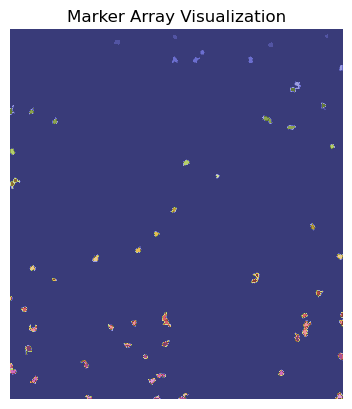

In [35]:
print(comparatorTester.markers.shape)
manager.view_marker_array(marker_array=comparatorTester.markers[10])

Collected Image from  /Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif  with shape  (2500, 2250)


(-0.5, 2249.5, 2499.5, -0.5)

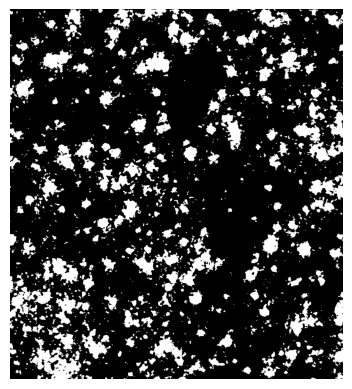

In [36]:
plt.imshow(test_segmenter.preprocess(), cmap='gray')
plt.axis("off")